# Кластерный анализ стран по инновационным показателям

В файле **WIPO-GII_2022.xlsx** содержаться данные по странам о показателях, используемых для расчета Global Innovation Index за 2022 год.

### В файле следующие переменные:
- Country
- Business environment
- Business sophistication index
- Citable documents H-index
- Creative goods and services
- Creative goods exports, % total trade
- Creative outputs index
- Cultural and creative services exports, % total trade
- Domestic market scale, bn PPP
- Ecological sustainability
- Expenditure on education, % GDP
- Firms offering formal training, %
- General infrastructure
- Government effectiveness
- Government's online service
- Graduates in science and engineering, %
- Gross expenditure on R&D, % GDP
- High-tech exports, % total trade
- High-tech imports, % total trade
- High-tech manufacturing, %
- Human capital and research index
- Information and Communications Technology access
- Information and Communications Technology services exports, % total trade
- Information and Communications Technology services imports, % total trade
- Information and Communications Technology use
- Infrastructure index
- Intangible assets
- Joint venture/strategic alliance deals/bn PPP GDP
- Knowledge absorption
- Knowledge and technology outputs index
- Knowledge workers
- Knowledge-intensive employment, %
- Logistics performance
- Market sophistication index
- Mobile app creation/bn PPP GDP
- Online creativity
- PISA scales in reading, maths and science
- Political and operational stability
- Political environment
- Pupil-teacher ratio, secondary
- QS university ranking average score of top 3 universities
- Research and development (R&D)
- Scientific and technical articles/bn PPP GDP
- Software spending, % GDP
- Tertiary education
- Tertiary enrolment, % gross
- University-industry R&D collaboration
- Region
- Region2
- Euro area
- European Union
- OECD members
- Least developed countries
- Income
- High income

In [1]:
pip install yellowbrick

In [2]:
import pandas as pd
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
import warnings
warnings.filterwarnings("ignore")

In [3]:
!pip install pingouin

import pandas as pd
from scipy import stats
from math import sqrt
import matplotlib.pyplot as plt
import pingouin as pg
from scipy.stats import pointbiserialr, norm
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_excel('WIPO-GII_2022.xlsx')
df.head()

,Country,Business environment_2022,Business sophistication index_2022,Citable documents H-index_2022,Creative goods and services_2022,"Creative goods exports, % total trade_2022",Creative outputs index_2022,"Cultural and creative services exports, % total trade_2022","Domestic market scale, bn PPP$_2022",Ecological sustainability_2022,...,"Tertiary enrolment, % gross_2022",University-industry R&D collaboration_2022,Region,Region2,Euro area,European Union,OECD members,Least developed countries,Income,High income
0,Cote d'Ivoire,48.3,21.8,5.1,1.2,0.3,6.0,2.1,3.4,23.7,...,4.0,38.5,Sub-Saharan Africa,Sub-Saharan Africa,0,0,0,0,middle income,0
1,Czechia,42.1,46.2,30.4,40.6,100.0,29.9,15.3,10.3,47.3,...,42.6,59.1,Europe & Central Asia,Europe,0,1,1,0,high income,1
2,"Egypt, Arab Rep.",45.0,20.4,18.0,9.1,16.9,14.1,0.0,30.9,25.4,...,24.1,47.0,Middle East & North Africa,Middle East and North Africa,0,0,0,0,middle income,0
3,"Hong Kong SAR, China",69.7,46.7,38.4,47.4,100.0,53.2,3.0,10.8,56.3,...,55.6,62.9,East Asia & Pacific,Asia-Pacific,0,0,0,0,high income,1
4,"Iran, Islamic Rep.",13.3,18.6,22.1,4.0,1.2,31.8,4.2,26.6,14.7,...,37.5,27.7,Middle East & North Africa,Middle East and North Africa,0,0,0,0,middle income,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 55 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Country                                                                         139 non-null    object 
 1   Business environment_2022                                                       132 non-null    float64
 2   Business sophistication index_2022                                              132 non-null    float64
 3   Citable documents H-index_2022                                                  132 non-null    float64
 4   Creative goods and services_2022                                                132 non-null    float64
 5   Creative goods exports, % total trade_2022                                      132 non-null    float64
 6   Creative outputs i

#### Выберем 5 метрических переменных для последующего проведения кластерного анализа данных. Аргументируем их выбор и использования для кластеризации.

Выбранные переменные:

Business sophistication index_2022                             

Cultural and creative services exports, % total trade_2022

Ecological sustainability_2022

Expenditure on education, % GDP_2022

Tertiary education_2022

In [6]:
df_new = df[['Business sophistication index_2022', 'Cultural and creative services exports, % total trade_2022', 'Ecological sustainability_2022', 'Expenditure on education, % GDP_2022', 'Tertiary education_2022']]

In [7]:
df_new[df_new.isna().any(axis=1)]

,Business sophistication index_2022,"Cultural and creative services exports, % total trade_2022",Ecological sustainability_2022,"Expenditure on education, % GDP_2022",Tertiary education_2022
8,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN
25,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
112,NaN,NaN,NaN,NaN,NaN
119,NaN,NaN,NaN,NaN,NaN


Выше мы убедились, что в строках, где пропущено одно из значений по выбранным метрическим переменным, пропущены и остальные, поэтому выкинем данные строки из рассмотрения и оставим таблицу без пропущенных значений

In [8]:
df_new = df_new.dropna()

In [9]:
df_new_kmeans = df_new.copy()

In [10]:
stats.kstest(df_new['Business sophistication index_2022'], 'norm', args = (df_new['Business sophistication index_2022'].mean(), df_new['Business sophistication index_2022'].std()))

KstestResult(statistic=np.float64(0.14801443190561392), pvalue=np.float64(0.005469641620605401), statistic_location=np.float64(27.6), statistic_sign=np.int8(1))

Проведём тест на нормальность Колмогорова-Смирнова для переменной 'Business sophistication index_2022':

Гипотеза H0: Распределение значений переменной "Business sophistication index_2022" статистически значимо не отличается от нормального распределения.

Гипотеза H1: Распределение значений переменной "Business sophistication index_2022" статистически значимо отличается от нормального распределения.

Вывод: поскольку p-value < 0.05, гипотеза H1 принимается => распределение статистически значимо отличается от нормального, значит используем коэффициент корреляции Спирмена

In [11]:
df_new.corr(method='spearman')

,Business sophistication index_2022,"Cultural and creative services exports, % total trade_2022",Ecological sustainability_2022,"Expenditure on education, % GDP_2022",Tertiary education_2022
Business sophistication index_2022,1.000000,0.609755,0.654279,0.284137,0.657263
"Cultural and creative services exports, % total trade_2022",0.609755,1.000000,0.515222,0.223404,0.493397
Ecological sustainability_2022,0.654279,0.515222,1.000000,0.076011,0.515422
"Expenditure on education, % GDP_2022",0.284137,0.223404,0.076011,1.000000,0.260962
Tertiary education_2022,0.657263,0.493397,0.515422,0.260962,1.000000


Данные переменные не имеют друг с другом сильной корреляции и это является основным аргументом в пользу их выбора

#### Выберем подходящий алгоритм кластеризации и обоснуем выбор. Определим число кластеров. Опишем получившиеся кластеры с помощью описательной статистки. Дадим названия кластерам.

В данном случае выбирем именно иерархический алгоритм, так как он не требует задания начальных параметров, а именно не требует число кластеров (как в KMeans) или радиус объединения точек (как в DBSCAN)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(df_new)

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

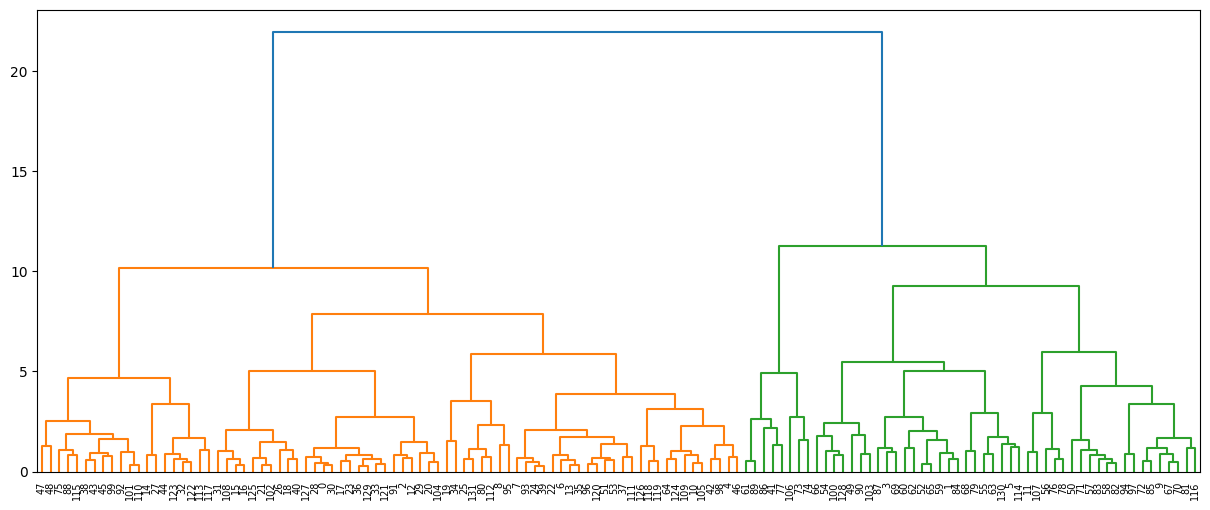

In [14]:
plt.figure(figsize=(15, 6))
Z = linkage(scaled, method='ward', metric='euclidean')
dn = dendrogram(Z, leaf_rotation=90, leaf_font_size=7)
plt.show()

In [15]:
from sklearn.metrics import calinski_harabasz_score
Z = linkage(scaled, method='ward', metric='euclidean')

In [16]:
for k in range (2, 10):
    labels = fcluster(Z, t=k, criterion='maxclust')
    print('Число кластеров: {}, индекс {}'.format(k, calinski_harabasz_score(scaled, labels)))

Число кластеров: 2, индекс 74.78292664552944
Число кластеров: 3, индекс 55.22395708417092
Число кластеров: 4, индекс 50.03242919028125
Число кластеров: 5, индекс 48.52146047576442
Число кластеров: 6, индекс 47.09099890401709
Число кластеров: 7, индекс 43.93132915490902
Число кластеров: 8, индекс 42.22248265504768
Число кластеров: 9, индекс 40.9660018846266


Выделим два кластера, потому что максимальное значение индекса Халински-Карабаша достигается при 2 кластерах

In [17]:
labels = fcluster(Z, t=2, criterion='maxclust')
labels

array([1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1],
      dtype=int32)

In [18]:
df_new['cluster_labels'] = labels  # создаём новую переменную, отражающую принадлежность наблюдения к кластеру
df_new

,Business sophistication index_2022,"Cultural and creative services exports, % total trade_2022",Ecological sustainability_2022,"Expenditure on education, % GDP_2022",Tertiary education_2022,cluster_labels
0,21.8,2.1,23.7,25.5,5.2,1
1,46.2,15.3,47.3,35.4,45.4,2
2,20.4,0.0,25.4,13.9,11.6,1
3,46.7,3.0,56.3,37.0,49.4,2
4,18.6,4.2,14.7,27.3,46.4,1
...,...,...,...,...,...,...
134,23.1,0.1,25.2,23.8,0.0,1
135,32.1,2.6,31.6,35.1,57.2,2
136,20.5,0.0,17.1,33.4,0.0,1
137,64.5,38.8,25.4,43.1,34.9,2


In [19]:
df_new['cluster_labels'].value_counts()

,count
cluster_labels,
1,80
2,52


In [20]:
df_new.agg(['mean','median','std','min','max']).drop(columns=['cluster_labels']).T

,mean,median,std,min,max
Business sophistication index_2022,31.859091,27.15,14.221830,10.2,69.8
"Cultural and creative services exports, % total trade_2022",14.340909,6.40,20.305149,0.0,100.0
Ecological sustainability_2022,29.426515,25.55,12.301250,13.0,57.3
"Expenditure on education, % GDP_2022",36.607576,35.30,18.977913,0.0,100.0
Tertiary education_2022,28.879545,31.00,16.396656,0.0,71.5


In [21]:
df_new.groupby('cluster_labels').agg(['mean','median','std','min','max']).T

cluster_labels                                                      1  \
Business sophistication index_2022                 mean     23.163750   
                                                   median   22.400000   
                                                   std       5.890182   
                                                   min      10.200000   
                                                   max      37.900000   
Cultural and creative services exports, % total... mean      6.067500   
                                                   median    1.950000   
                                                   std      10.171613   
                                                   min       0.000000   
                                                   max      54.400000   
Ecological sustainability_2022                     mean     21.510000   
                                                   median   19.950000   
                                                   std       5.826600   
                                                   min      13.000000   
                                                   max      41.300000   
Expenditure on education, % GDP_2022               mean     35.993750   
                                                   median   33.600000   
                                                   std      19.613102   
                                                   min       0.000000   
                                                   max     100.000000   
Tertiary education_2022                            mean     21.140000   
                                                   median   20.900000   
                                                   std      13.633007   
                                                   min       0.000000   
                                                   max      50.300000   

cluster_labels                                                      2  
Business sophistication index_2022                 mean     45.236538  
                                                   median   47.450000  
                                                   std      12.834421  
                                                   min      15.700000  
                                                   max      69.800000  
Cultural and creative services exports, % total... mean     27.069231  
                                                   median   18.150000  
                                                   std      25.024392  
                                                   min       0.000000  
                                                   max     100.000000  
Ecological sustainability_2022                     mean     41.605769  
                                                   median   43.500000  
                                                   std       9.303118  
                                                   min      21.600000  
                                                   max      57.300000  
Expenditure on education, % GDP_2022               mean     37.551923  
                                                   median   37.350000  
                                                   std      18.103932  
                                                   min       0.000000  
                                                   max      76.000000  
Tertiary education_2022                            mean     40.786538  
                                                   median   42.000000  
                                                   std      12.812464  
                                                   min       6.500000  
                                                   max      71.500000

Исходя из статистики выше мы видим, что в среднем в первом кластере все пять показателей ниже средних на выборке, а во втором кластере, наоборот, выше. Наиболее заметна разница между кластерами в показателе "Cultural and creative services exports, % total trade_2022".

Кластер 1 – "Менее развитые страны"

Business sophistication index_2022: среднее 23.16, медиана 22.40, стандартное отклонение 5.89. Кластер характеризуется низким уровнем развития бизнеса.

Cultural and creative services exports (% total trade_2022): среднее 6.07, медиана 1.95, стандартное отклонение 10.17. Небольшая доля креативного экспорта, но с присутствием единичных высоких значений (max - 54.4).

Ecological sustainability_2022: среднее 21.51, медиана 19.95, стандартное отклонение 5.83. Низкая экологическая устойчивость.

Expenditure on education (% GDP_2022): среднее 35.99, медиана 33.60, стандартное отклонение 19.61. Расходы на образование средние, но разброс данных большой (можно заметить на графике ниже), что указывает на неоднородность в кластере.

Tertiary education_2022: среднее 21.14, медиана 20.90, стандартное отклонение 13.63. Низкий уровень высшего образования.

Вывод: Кластер объединяет страны с относительно низким уровнем развития экономики, низким культурным и образовательным потенциалом и невысокой экологической устойчивостью, поэтому разумно назвать его "Менее развитые страны"


Кластер 2 – "Более развитые страны"

Business sophistication index_2022: среднее 45.24, медиана 47.45, стандартное отклонение 12.83. Кластер характеризуется высоким уровенем развития бизнеса.

Cultural and creative services exports (% total trade_2022): среднее 27.07, медиана 18.15, стандартное отклонение 25.02. Большая доля креативного экспорта, кластер включает в себя страны с очень высоким уровнем креативного экспорта.

Ecological sustainability_2022: среднее 41.61, медиана 43.50, стандартное отклонение 9.30. Высокая экологическая устойчивость.

Expenditure on education (% GDP_2022): среднее 37.55, медиана 37.35, стандартное отклонение 18.10. Расходы на образование выше среднего.

Tertiary education_2022: среднее 40.79, медиана 42.00, стандартное отклонение 12.81. Высокий уровень высшего образования.

Вывод: Кластер объединяет страны с развитой экономикой, высоким уровнем образования, развитым культурным и креативным сектором и высокой экологической устойчивостью.

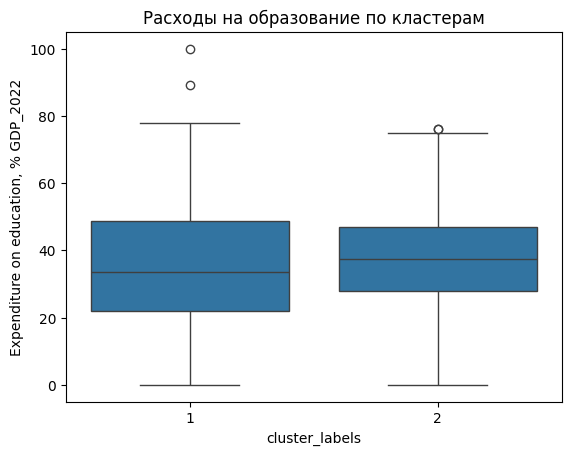

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='cluster_labels', y='Expenditure on education, % GDP_2022', data=df_new)
plt.title('Расходы на образование по кластерам')
plt.show()

#### Проведем апостериорный анализ данных на основе категориальных переменных датасета. Рассмотрим как распределены страны разных регионов по кластерам.

In [23]:
df_full = df.merge(df_new[['cluster_labels']], left_index=True, right_index=True, how='inner')
df_full

,Country,Business environment_2022,Business sophistication index_2022,Citable documents H-index_2022,Creative goods and services_2022,"Creative goods exports, % total trade_2022",Creative outputs index_2022,"Cultural and creative services exports, % total trade_2022","Domestic market scale, bn PPP$_2022",Ecological sustainability_2022,...,University-industry R&D collaboration_2022,Region,Region2,Euro area,European Union,OECD members,Least developed countries,Income,High income,cluster_labels
0,Cote d'Ivoire,48.3,21.8,5.1,1.2,0.3,6.0,2.1,3.4,23.7,...,38.5,Sub-Saharan Africa,Sub-Saharan Africa,0,0,0,0,middle income,0,1
1,Czechia,42.1,46.2,30.4,40.6,100.0,29.9,15.3,10.3,47.3,...,59.1,Europe & Central Asia,Europe,0,1,1,0,high income,1,2
2,"Egypt, Arab Rep.",45.0,20.4,18.0,9.1,16.9,14.1,0.0,30.9,25.4,...,47.0,Middle East & North Africa,Middle East and North Africa,0,0,0,0,middle income,0,1
3,"Hong Kong SAR, China",69.7,46.7,38.4,47.4,100.0,53.2,3.0,10.8,56.3,...,62.9,East Asia & Pacific,Asia-Pacific,0,0,0,0,high income,1,2
4,"Iran, Islamic Rep.",13.3,18.6,22.1,4.0,1.2,31.8,4.2,26.6,14.7,...,27.7,Middle East & North Africa,Middle East and North Africa,0,0,0,0,middle income,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Paraguay,28.8,23.1,3.2,0.6,1.1,18.1,0.1,2.1,25.2,...,26.8,Latin America & Caribbean,Americas,0,0,0,0,middle income,0,1
135,Peru,50.4,32.1,14.4,12.6,2.7,19.5,2.6,10.0,31.6,...,32.7,Latin America & Caribbean,Americas,0,0,0,0,middle income,0,2
136,Trinidad and Tobago,47.6,20.5,4.0,1.7,1.7,4.5,0.0,0.6,17.1,...,33.6,Latin America & Caribbean,Americas,0,0,0,0,high income,1,1
137,United States,75.3,64.5,100.0,44.8,33.8,48.4,38.8,100.0,25.4,...,79.6,North America,Americas,0,0,1,0,high income,1,2


In [24]:
pd.crosstab(df_full['cluster_labels'], df_full['OECD members'])

OECD members,0,1
cluster_labels,,
1,75,5
2,19,33


Почти все члены OECD - это более развитые страны, которые находятся во втором кластере

In [25]:
pd.crosstab(df_full['cluster_labels'], df_full['European Union'])

European Union,0,1
cluster_labels,,
1,79,1
2,26,26


Почти все страны Европейского союза являются более развитыми странами, т к почти все из них входят во второй кластер

In [26]:
pd.crosstab(df_full['cluster_labels'], df_full['Euro area'])

Euro area,0,1
cluster_labels,,
1,80,0
2,32,20


Все страны, которые входят в область euro являются более развитыми странами, т к входят во второй кластер

In [27]:
pd.crosstab(df_full['cluster_labels'], df_full['Least developed countries'])

Least developed countries,0,1
cluster_labels,,
1,58,22
2,51,1


Почти все наименее развитые страны входят в первый кластер "менее развитые страны"

In [28]:
pd.crosstab(df_full['cluster_labels'], df_full['Region'])

Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
cluster_labels,,,,,,,
1,9,12,16,12,0,4,27
2,8,35,2,4,2,1,0


Из таблицы выше можем заметить, что все страны региона Sub-Saharan Africa, большинство Latin America & Caribbean, большинство стран South Asia и большинство стран Middle East & North Africa попали в кластер менее развитых стран, в то время, как все страны региона North America и большинство стран Europe & Central Asia попали в кластер более развитых стран

In [29]:
pd.crosstab(df_full['cluster_labels'], df_full['Region2'])

Region2,Americas,Asia-Pacific,Europe,Middle East and North Africa,Sub-Saharan Africa
cluster_labels,,,,,
1,16,17,8,12,27
2,4,9,37,2,0


Из таблицы выше можем заметить, что все страны региона Sub-Saharan Africa, большинство стран Americas, большинство стран Asia-Pacific и большинство стран Middle East and North Africa попали в кластер менее развитых стран, в то время, как все страны региона North America и большинство стран из региона Europe попали в кластер более развитых стран

#### Опишем, почему получилась именно такая кластерная структура.

Алгоритм выделил два кластера по пяти выбранным переменным: бизнес-развитие, экспорт культурных услуг, экологическая устойчивость, расходы на образование и доля населения с высшим образованием.

Кластер 1 («Развивающиеся страны»): низкие показатели по бизнес-развитию, экспорту культурных услуг, экологической устойчивости и образованию. Разброс по расходам на образование большой, данные неоднородные.

Кластер 2 («Развитые страны»): высокие показатели по всем переменным.

Полученные результаты были ожидаемы, т к структура кластеров вполне разумно отражает экономическое, культурное и образовательное различие стран. Было ожидаемо, что более развитые страны сгруппировались отдельно от только развивающихся.

Дополнительно с помощью алгоритма KMeans разделим по данным пяти переменным всё на кластеры и сравним, что получится в данном случае

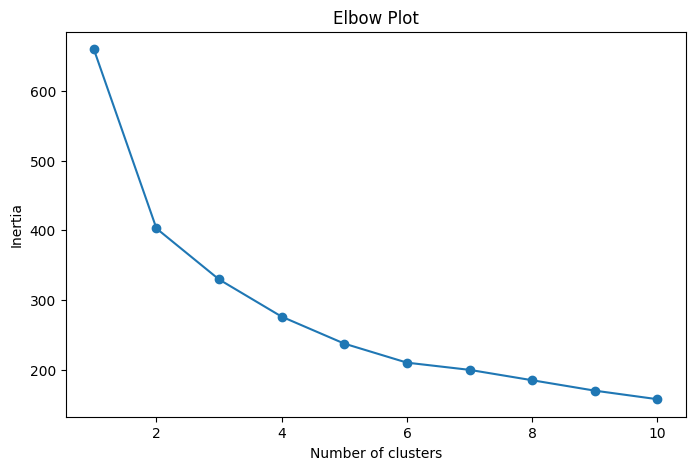

In [30]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_new_kmeans)

inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Исходя из графика выше по методу локтя определили, что оптимально 2 кластера

In [31]:
kmeans = KMeans(n_clusters=2, random_state=1) # оптимально 2 кластера
kmeans.fit(scaled_data)

df_new_kmeans['cluster_labels'] = kmeans.labels_
df_new_kmeans

,Business sophistication index_2022,"Cultural and creative services exports, % total trade_2022",Ecological sustainability_2022,"Expenditure on education, % GDP_2022",Tertiary education_2022,cluster_labels
0,21.8,2.1,23.7,25.5,5.2,1
1,46.2,15.3,47.3,35.4,45.4,0
2,20.4,0.0,25.4,13.9,11.6,1
3,46.7,3.0,56.3,37.0,49.4,0
4,18.6,4.2,14.7,27.3,46.4,1
...,...,...,...,...,...,...
134,23.1,0.1,25.2,23.8,0.0,1
135,32.1,2.6,31.6,35.1,57.2,0
136,20.5,0.0,17.1,33.4,0.0,1
137,64.5,38.8,25.4,43.1,34.9,0


In [32]:
df_new_kmeans['cluster_labels'].value_counts()

,count
cluster_labels,
1,82
0,50


In [33]:
df_new_kmeans.groupby('cluster_labels').agg(['mean','median','std','min','max']).T

cluster_labels                                                      0  \
Business sophistication index_2022                 mean     46.586000   
                                                   median   48.250000   
                                                   std      11.481805   
                                                   min      27.500000   
                                                   max      69.800000   
Cultural and creative services exports, % total... mean     28.822000   
                                                   median   22.800000   
                                                   std      24.560108   
                                                   min       0.000000   
                                                   max     100.000000   
Ecological sustainability_2022                     mean     41.422000   
                                                   median   43.100000   
                                                   std       9.256995   
                                                   min      21.600000   
                                                   max      57.300000   
Expenditure on education, % GDP_2022               mean     39.640000   
                                                   median   39.600000   
                                                   std      16.123756   
                                                   min       0.000000   
                                                   max      76.000000   
Tertiary education_2022                            mean     41.756000   
                                                   median   42.000000   
                                                   std      10.994157   
                                                   min      19.400000   
                                                   max      71.500000   

cluster_labels                                                      1  
Business sophistication index_2022                 mean     22.879268  
                                                   median   22.200000  
                                                   std       5.643761  
                                                   min      10.200000  
                                                   max      37.900000  
Cultural and creative services exports, % total... mean      5.510976  
                                                   median    1.550000  
                                                   std       9.671123  
                                                   min       0.000000  
                                                   max      54.400000  
Ecological sustainability_2022                     mean     22.112195  
                                                   median   20.400000  
                                                   std       7.064594  
                                                   min      13.000000  
                                                   max      51.200000  
Expenditure on education, % GDP_2022               mean     34.758537  
                                                   median   32.450000  
                                                   std      20.397948  
                                                   min       0.000000  
                                                   max     100.000000  
Tertiary education_2022                            mean     21.028049  
                                                   median   20.500000  
                                                   std      14.033279  
                                                   min       0.000000  
                                                   max      53.600000

In [34]:
df_new_kmeans['cluster_labels_shifted'] = df_new_kmeans['cluster_labels'].map({0 : 2, 1 : 1})

In [35]:
comparison = pd.DataFrame({
    'hierarchical': df_new['cluster_labels'],
    'kmeans': df_new_kmeans['cluster_labels_shifted']
})

matches = (comparison['hierarchical'] == comparison['kmeans']).sum()
total = len(comparison)
print(f"Совпадений: {matches} из {total}")
print(f"Доля совпадений: {matches/total:.2%}")

Совпадений: 126 из 132
Доля совпадений: 95.45%


Таким образом алгоритм KMeans выдаёт практически такой же результат разбиения по кластерам, как и иерархический алгоритм